# Task 1
- 3 regression models

### 1) Linear Regression
- no_of_Mosquito = function(weather_features^A)

### 2) Linear Regression
- no_of_Mosquito_female = function(weather_features^B)
- OR no_of_Mosquito_male = function(weather_features^C)
- Preferably do both

### 3) Polynomial Regression
- no_of_Mosquito_female = function(weather_features^B)
- OR no_of_Mosquito_male = function(weather_features^C)
- Preferably do both

NOTE: A, B, C are a note that a subset of the inputs is used.
Use different cost functions, perform analysis of constructed models, apply normalization and standardization, feature selection

## Dataset

- You need to combine both data sets to prepare a data set suitable for model construction.
- Both data sets have different ‘time grid’ so you need to resolve it.
- You have to aggregate data points over time, and different mosquito species.

### Mosquito data notes:
From website: Capture results of mosquitoes from various locations in Edmonton. These collections are from standard New Jersey light traps that are commonly used to record changes in abundance of mosquitoes before and after control campaigns and to compare seasonal and annual fluctuations in population. Since not all mosquito species are attracted equally to light traps, the City uses a variety of other trapping and survey methods (with their own limitations) to monitor mosquitoes. Not all trap collection sites are factored into the historical averages. Some data can be incomplete due to trap failure. Some trap locations change over time. Trap collections reflect, not absolute population levels, but mosquito activity, which is influenced by changing environmental conditions (temperature, humidity, wind, etc.). The weekly averages do not include any male mosquitoes or any females of species that do not typically bite people. Each data set reflects the mosquito activity of the week previous to the collection date.

To complement this dataset, there is the Rainfall Gauge data which measures rainfall data in the Greater Edmonton area.


- Data collected from May 1990 onward
- Data is updated weekly and collected automatically

#### Columns:

- Trap Date (Date & Time Floating timestamp): date when the mosquito traps are collected. An empty mosquito traps are replaced for the next collection at the same time.
- Genus (Text): When biologists talk about a genus, they mean one or more species of animals or plants that are closely related to each other. Low-level taxonomic ranking for biological classification.
- Specific Epithet (Text): lowest taxonomic rank and having common characteristics and (usually) capable of mating with one another.
- Gender (Text): male or female
- IDd (Text or NaN): specimens too damaged for precise identification or not sigificant in the mosquito program are marked with a value of UnID.
- Count (Number/Int): number of mosquitoes trapped at this Trap Region on this Trap Date.
- Trap Region (Text): The description of where the mosquito trap was placed.
- Include (Text or NaN): blank or no.
- Comparison Group (Text): Trap areas used to evaluate mosquito program efficacy.
- Latitude (Number/Float): geographic coordinate that specifies north-south position of mosquito trap.
- Longitude (Number/Float): The geographic coordinate that specifies the east–west position of the mosquito trap.
- Location (Point): The combination of latitude/longitude for mapping purposes.

## Edmoton weather notes:
- Source: weatherstats.ca based on Environment and Climate Change Canada data

### Columns (personal notes):
- date_time_local (Date/Time human format YYYY-MM-DD HH:MM:SS TZ): date and time data recorded.
- unixtime: unix time format
- pressure_station (float or NaN):
- pressure_sea (float or NaN):
- wind_dir (Text or NaN): wind direction in compass directions (SW, WSW ... etc)
- wind_dir_10s (float or NaN): 
- wind_speed (float or NaN): speed of the wind in CONVUNIT <- TBD
- wind_gust (NaN or float): 
- relative_humidty (float or NaN):
- dew_point (float or NaN): 
- temperature (float or NaN): temp recorded
- windchill (float or NaN):
- humidex (float or NaN):
- visibility (float or NaN):
- health_index (float or NaN):
- cloud_cover_4 (float or NaN):
- cloud_cover_8 (float or NaN):
- cloud_cover_10 (float or NaN):
- solar_radiation (float or NaN):


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white bg for sns plots
sns.set(style="whitegrid", color_codes=True)

from datetime import timedelta

import time
import warnings
warnings.simplefilter(action='ignore')

## Read csv files

In [3]:
mos_data = pd.read_csv("./data/mosquito_data.csv")
weather_data = pd.read_csv("./data/weather_data.csv")


orig_mos_data = mos_data.copy()
orig_weather_data = weather_data.copy()

In [4]:
mos_data.head()

,trap_date,genus,specific_epithet,gender,idd,count,trap_region,include,comparison_group,latitude,longitude,geocoded_column
0,2015-09-15T00:00:00.000,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,POINT (-113.787353 53.5629733)
1,1998-05-12T00:00:00.000,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
2,2001-08-28T00:00:00.000,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
3,2004-08-17T00:00:00.000,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
4,2018-05-15T00:00:00.000,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,POINT (-114.00119 53.559020000000004)


In [5]:
#dat=mos_data[mos_data["new_trap_date" ]=="2017-06-13"]
#mos_data["new_trap_date"].value_counts()
#mosdat=mos_data.sort_values(by="new_trap_date",inplace=False,ascending=False)
#mergedata=pd.merge(mosdat,weather_data,how='right', on=['new_trap_date', 'new_date_time_local'])

In [6]:
weather_data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-12-18 16:00:00 MST,1545174000,91.73,99.7,SW,23.0,5.0,NaN,64.0,-7.3,-1.3,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-18 15:00:00 MST,1545170400,91.67,99.7,S,18.0,5.0,NaN,65.0,-6.3,-0.5,-2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,2018-12-18 14:00:00 MST,1545166800,91.67,99.6,S,17.0,5.0,NaN,51.0,-6.5,2.7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,2018-12-18 13:00:00 MST,1545163200,91.66,99.6,SE,13.0,2.0,NaN,50.0,-6.4,2.9,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN
4,2018-12-18 12:00:00 MST,1545159600,91.75,99.7,NaN,NaN,0.0,NaN,59.0,-6.6,0.5,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN


In [7]:
weather_data.describe()

,unixtime,pressure_station,pressure_sea,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
count,1.752000e+04,17509.000000,17509.000000,17467.000000,17509.000000,2282.000000,17509.000000,17509.000000,17509.000000,6424.000000,840.000000,0.0,17161.000000,0.0,0.0,0.0,0.0
mean,1.513640e+09,93.539797,101.577269,21.190130,11.045519,34.594216,66.730367,-2.305232,4.313787,-13.476339,27.017857,NaN,2.760760,NaN,NaN,NaN,NaN
std,1.820784e+07,0.794158,0.923358,9.780622,6.286950,7.295547,20.052285,9.813175,12.447193,8.109714,2.033900,NaN,0.997628,NaN,NaN,NaN,NaN
min,1.482106e+09,90.650000,98.400000,0.000000,0.000000,27.000000,11.000000,-33.800000,-30.700000,-40.000000,25.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,1.497873e+09,93.060000,101.000000,14.000000,6.000000,29.000000,52.000000,-8.400000,-4.300000,-19.000000,25.000000,NaN,2.200000,NaN,NaN,NaN,NaN
50%,1.513640e+09,93.580000,101.600000,23.000000,10.000000,33.000000,70.000000,-1.500000,4.000000,-12.000000,27.000000,NaN,2.600000,NaN,NaN,NaN,NaN
75%,1.529407e+09,94.050000,102.200000,29.000000,15.000000,38.000000,83.000000,5.400000,14.300000,-7.000000,28.000000,NaN,3.200000,NaN,NaN,NaN,NaN
max,1.545174e+09,95.960000,104.800000,36.000000,48.000000,88.000000,100.000000,18.500000,34.300000,0.000000,35.000000,NaN,11.000000,NaN,NaN,NaN,NaN


In [8]:
mos_data.dtypes

trap_date            object
genus                object
specific_epithet     object
gender               object
idd                  object
count                 int64
trap_region          object
include              object
comparison_group     object
latitude            float64
longitude           float64
geocoded_column      object
dtype: object

In [9]:
weather_data.dtypes

date_time_local       object
unixtime               int64
pressure_station     float64
pressure_sea         float64
wind_dir              object
wind_dir_10s         float64
wind_speed           float64
wind_gust            float64
relative_humidity    float64
dew_point            float64
temperature          float64
windchill            float64
humidex              float64
visibility           float64
health_index         float64
cloud_cover_4        float64
cloud_cover_8        float64
cloud_cover_10       float64
solar_radiation      float64
dtype: object

In [10]:
mos_data.isnull().sum()

trap_date             0
genus                 0
specific_epithet      0
gender                0
idd                 709
count                 0
trap_region           0
include             969
comparison_group      0
latitude              0
longitude             0
geocoded_column       0
dtype: int64

In [11]:
weather_data.isnull().sum()

date_time_local          0
unixtime                 0
pressure_station        11
pressure_sea            11
wind_dir               154
wind_dir_10s            53
wind_speed              11
wind_gust            15238
relative_humidity       11
dew_point               11
temperature             11
windchill            11096
humidex              16680
visibility           17520
health_index           359
cloud_cover_4        17520
cloud_cover_8        17520
cloud_cover_10       17520
solar_radiation      17520
dtype: int64

In [12]:
# drop visibility, cloud_cover_4, cloud_cover_8, cloud_cover_10, solar_radiation as they are all NaN, also humidex and windchill and windgust as they are mostly NaN and nothing that we can do about
weather_data=orig_weather_data.drop(columns=["visibility", "cloud_cover_4", "cloud_cover_8", "cloud_cover_10", "solar_radiation", "wind_gust", "windchill", "humidex"], inplace=False)
# and drop the row with missing values
#weather_data.dropna(inplace=True)
print(weather_data.isnull().sum())
#drop idd include
mos_data=orig_mos_data.drop(columns=["idd","include","geocoded_column","latitude","longitude","geocoded_column"])
#print(mos_data.isnull().sum())
#mos_data.count()
#weather_data.count()

date_time_local        0
unixtime               0
pressure_station      11
pressure_sea          11
wind_dir             154
wind_dir_10s          53
wind_speed            11
relative_humidity     11
dew_point             11
temperature           11
health_index         359
dtype: int64


In [13]:
mos_data["trap_region"].value_counts()

Rural-North West                  147
Rural-North East                  106
Rural-South East                   97
Rural-South West                   84
River Valley-West                  74
Rural-East                         56
River Valley-East-P1               55
Residential-South                  41
Rural-West                         40
Residential-North                  28
Outer Community-South1             27
Outer Community-North              22
Industrial East                    22
Outer Community-South West         22
River Valley-West-P1               19
River Valley-GC2-East              17
Extended Rural-South West          17
Residential GC-South               16
River Valley-Central-P1            16
Outer Community-South East         16
Outer Community-North East         15
Rural GC-South East                14
River Valley-GC1-East              12
River Valley-GC1-Central           10
River Valley-East                   8
River Valley-Central                8
Outer Commun

## Date and time 
We can see that both datasets are timestamped but the mosquito dataset is timestamped.
Our first task would be combining both datasets by day and month and year ignoring HH:MM:DD.
- Create a new_trap_date column in mos_data following the format YYYY-MM-DD
- Drop trap_date from mos_data
- create new_date column in weather_data following the format YYYY-MM-DD
- Drop date_time_local and unixtime in weather_data

In [14]:
mos_data["new_trap_date"] = mos_data.apply(lambda x: x["trap_date"].split("T")[0], axis=1)
#mos_data.drop(columns=["trap_date"], inplace=True) #redundant

mos_data.head()

,trap_date,genus,specific_epithet,gender,count,trap_region,comparison_group,new_trap_date
0,2015-09-15T00:00:00.000,Aedes,vexans,Female,3,Rural-West,Outer,2015-09-15
1,1998-05-12T00:00:00.000,Male,UnID,Male,1,Rural-North West,Peripheral,1998-05-12
2,2001-08-28T00:00:00.000,Culex,tarsalis,Female,1,Rural-North West,Peripheral,2001-08-28
3,2004-08-17T00:00:00.000,Culex,territans,Female,1,Rural-North West,Peripheral,2004-08-17
4,2018-05-15T00:00:00.000,Culiseta,impatiens,Female,2,Rural-West,Outer,2018-05-15


In [15]:
#convert new_trap_date into datetime
format = '%Y-%m-%d'
mos_data["new_trap_date"] = pd.to_datetime(mos_data["new_trap_date"], format=format)

mos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trap_date         1000 non-null   object        
 1   genus             1000 non-null   object        
 2   specific_epithet  1000 non-null   object        
 3   gender            1000 non-null   object        
 4   count             1000 non-null   int64         
 5   trap_region       1000 non-null   object        
 6   comparison_group  1000 non-null   object        
 7   new_trap_date     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 62.6+ KB


In [16]:
#Mountain Daylight Time (MDT) to Mountain Standard Time (MST)
def Tzone(x):
    timelist=x["date_time_local"].split(" ")
    YD=timelist[0]+timelist[1]
    timec=time.mktime(time.strptime(YD,'%Y-%m-%d%H:%M:%S'))
    if timelist[2]=='MDT':
        timec=timec+3600 # add one hour 
    return time.strftime("%Y-%m-%d", time.localtime(timec))
weather_data["new_date_time_local"] = weather_data.apply(lambda x: Tzone(x), axis=1)
weather_data.drop(columns=["date_time_local", "unixtime"], inplace=True)

weather_data["new_date_time_local"] = pd.to_datetime(weather_data["new_date_time_local"], format='%Y-%m-%d')

In [17]:
weather_data.head()

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
0,91.73,99.7,SW,23.0,5.0,64.0,-7.3,-1.3,NaN,2018-12-18
1,91.67,99.7,S,18.0,5.0,65.0,-6.3,-0.5,4.0,2018-12-18
2,91.67,99.6,S,17.0,5.0,51.0,-6.5,2.7,4.0,2018-12-18
3,91.66,99.6,SE,13.0,2.0,50.0,-6.4,2.9,3.9,2018-12-18
4,91.75,99.7,NaN,NaN,0.0,59.0,-6.6,0.5,4.1,2018-12-18


In [18]:
# ranges of date/time columns in both dataset
mos_date_range = str(mos_data['new_trap_date'].dt.date.min()) + ' to ' +str(mos_data['new_trap_date'].dt.date.max())
weather_date_range = str(weather_data['new_date_time_local'].dt.date.min()) + ' to ' +str(weather_data['new_date_time_local'].dt.date.max())

print("Range of dates in mosquito dataset is {}".format(mos_date_range))
print("Range of dates in weather dataset is {}".format(weather_date_range))

Range of dates in mosquito dataset is 1990-05-22 to 2020-09-22
Range of dates in weather dataset is 2016-12-18 to 2018-12-18


It can be seen that the mosquito dataset is covering a much bigger range so everything before 2016-12-18 and after 2018-12-18 will be ignored.

In [19]:
start_remove = weather_data['new_date_time_local'].min()
end_remove = weather_data['new_date_time_local'].max()

In [20]:
mos_data = mos_data.loc[(mos_data["new_trap_date"] >= start_remove) & (mos_data["new_trap_date"] <= end_remove) ]

mos_date_range = str(mos_data['new_trap_date'].dt.date.min())+' to ' + str(mos_data['new_trap_date'].dt.date.max())
print("Range of dates in mosquito dataset is {}".format(mos_date_range))

Range of dates in mosquito dataset is 2017-05-09 to 2018-09-18


In [21]:
mos_data.sort_values(by="new_trap_date",inplace=True,ascending=True)

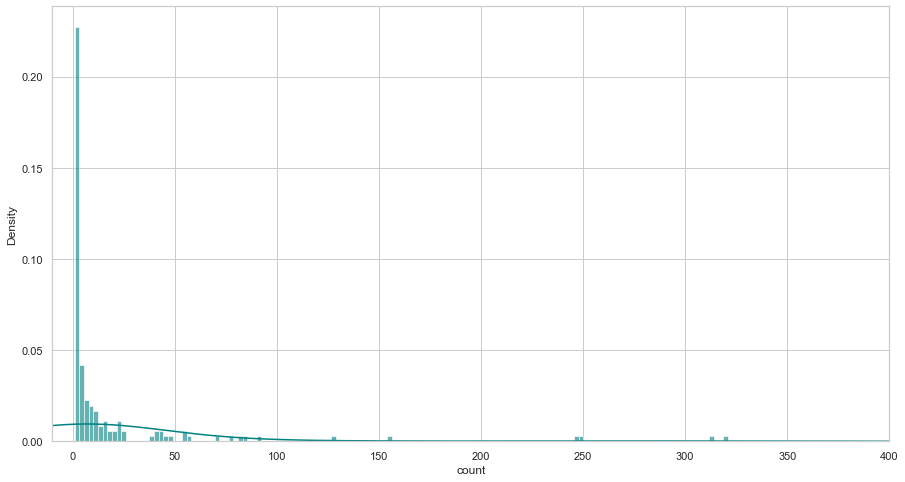

In [22]:
#current distribution:
plt.figure(figsize=(15, 8))
ax = mos_data["count"].hist(bins=500, density=True, stacked=True, color='teal', alpha=0.6)
mos_data["count"].plot(kind='density', color='teal')


ax.set(xlabel="count")
plt.xlim(-10,400)
plt.show()

In [23]:
mos_data.isnull().sum()

trap_date           0
genus               0
specific_epithet    0
gender              0
count               0
trap_region         0
comparison_group    0
new_trap_date       0
dtype: int64

In [24]:
len(mos_data.index)

156

### Grouping weather data on date column


In [25]:
len(weather_data.index)

17520

Replace null data in weather_data

In [26]:
weather_data.isnull().sum()

pressure_station        11
pressure_sea            11
wind_dir               154
wind_dir_10s            53
wind_speed              11
relative_humidity       11
dew_point               11
temperature             11
health_index           359
new_date_time_local      0
dtype: int64

In [27]:
weather_data.reset_index(drop=True, inplace=True)

It looks like health index is normally distributed so its safe to replace na with mean value:

In [28]:
weather_data.isnull().sum()

pressure_station        11
pressure_sea            11
wind_dir               154
wind_dir_10s            53
wind_speed              11
relative_humidity       11
dew_point               11
temperature             11
health_index           359
new_date_time_local      0
dtype: int64

In [29]:
weather_data.head()

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
0,91.73,99.7,SW,23.0,5.0,64.0,-7.3,-1.3,NaN,2018-12-18
1,91.67,99.7,S,18.0,5.0,65.0,-6.3,-0.5,4.0,2018-12-18
2,91.67,99.6,S,17.0,5.0,51.0,-6.5,2.7,4.0,2018-12-18
3,91.66,99.6,SE,13.0,2.0,50.0,-6.4,2.9,3.9,2018-12-18
4,91.75,99.7,NaN,NaN,0.0,59.0,-6.6,0.5,4.1,2018-12-18


In [30]:
perday_weather_data = weather_data.groupby("new_date_time_local").agg({ #,as_index=False
    #"new_date_time_local": 'first',
    "pressure_station": lambda x: round(x.mean(),2),
    "pressure_sea": lambda x: round(x.mean(),1),
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.mode().iloc[0],
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
    "health_index": lambda x: round(x.mean(),1),
})
#perday_weather_data.reset_index()
perday_weather_data.head()

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index
new_date_time_local,,,,,,,,,
2016-12-18,92.50,100.6,W,26.0,17.4,52.0,-6.50,2.10,2.4
2016-12-19,92.04,100.0,W,27.0,15.6,52.5,-8.25,0.65,2.7
2016-12-20,92.53,100.6,WSW,20.0,7.6,58.0,-11.30,-3.70,3.5
2016-12-21,93.05,101.2,SSW,21.0,11.6,55.5,-8.05,-0.05,3.1
2016-12-22,92.42,100.4,SSW,21.0,7.2,59.0,-8.05,-0.80,3.8


#### seperate the wind_dir into 4 columns : wind_dir_W,wind_dir_S,wind_dir_N,wind_dir_E

In [31]:
wind_dirc=perday_weather_data["wind_dir"].str.split('', expand=True)
wind_dirc

,0,1,2,3,4
new_date_time_local,,,,,
2016-12-18,,W,,None,None
2016-12-19,,W,,None,None
2016-12-20,,W,S,W,
2016-12-21,,S,S,W,
2016-12-22,,S,S,W,
...,...,...,...,...,...
2018-12-14,,S,,None,None
2018-12-15,,N,W,,None
2018-12-16,,E,S,E,


In [32]:
wind_dir_num=wind_dirc.apply(lambda x:x.value_counts()[1:4],axis = 1).fillna(0)
wind_dir_num.rename(columns={'E':'wind_dir_E', 'N': 'wind_dir_N', 'S': 'wind_dir_S', 'W': 'wind_dir_W'}, inplace=True) 

In [33]:
perday_weather_data=perday_weather_data.join(wind_dir_num)

In [34]:
perday_weather_data=perday_weather_data.drop(columns=["wind_dir"])

#### calculate the delta_pressure

In [35]:
perday_weather_data["delta_pressure"]=perday_weather_data.apply(lambda x:x["pressure_station"]-x["pressure_sea"], axis=1)
perday_weather_data

,pressure_station,pressure_sea,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,wind_dir_E,wind_dir_N,wind_dir_S,wind_dir_W,delta_pressure
new_date_time_local,,,,,,,,,,,,,
2016-12-18,92.50,100.6,26.0,17.4,52.0,-6.50,2.10,2.4,0.0,0.0,0.0,1.0,-8.10
2016-12-19,92.04,100.0,27.0,15.6,52.5,-8.25,0.65,2.7,0.0,0.0,0.0,1.0,-7.96
2016-12-20,92.53,100.6,20.0,7.6,58.0,-11.30,-3.70,3.5,0.0,0.0,1.0,2.0,-8.07
2016-12-21,93.05,101.2,21.0,11.6,55.5,-8.05,-0.05,3.1,0.0,0.0,2.0,1.0,-8.15
2016-12-22,92.42,100.4,21.0,7.2,59.0,-8.05,-0.80,3.8,0.0,0.0,2.0,1.0,-7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-14,91.93,99.9,19.0,13.2,64.0,-5.00,2.60,3.0,0.0,0.0,1.0,0.0,-7.97
2018-12-15,92.56,100.6,31.0,17.5,55.0,-8.75,0.50,2.4,0.0,1.0,0.0,1.0,-8.04
2018-12-16,93.46,101.7,12.0,11.3,73.0,-12.00,-7.35,2.5,2.0,0.0,1.0,0.0,-8.24


In [36]:
mos_data.isnull().sum()

trap_date           0
genus               0
specific_epithet    0
gender              0
count               0
trap_region         0
comparison_group    0
new_trap_date       0
dtype: int64

In [37]:
index_mos_data=mos_data.drop(columns=["trap_date"])
#index_mos_data=mos_data.set_index("new_trap_date")

index_mos_data.head()

,genus,specific_epithet,gender,count,trap_region,comparison_group,new_trap_date
871,Culiseta,inornata,Female,1,Rural-South East,Peripheral,2017-05-09
888,Culiseta,alaskaensis,Female,1,Residential GC-South,Core,2017-05-16
977,Ochlerotatus,Black legs,Female,6,Rural-West,Outer,2017-05-23
688,Ochlerotatus,euedes,Female,3,Outer Community-North,Outer,2017-05-23
48,Male,UnID,Male,15,Rural-East,Outer,2017-05-23


In [38]:
len(perday_weather_data.index)

731

In [39]:
#perday_weather_data = perday_weather_data.set_index（'cuspin'，append = True）

## Merge Data

In [40]:
mergedata=pd.merge(left=perday_weather_data , right=mos_data, left_on="new_date_time_local", right_on="new_trap_date", how='outer', indicator=True)

In [41]:
mergedata.isnull().sum()
mergedata.describe()

,pressure_station,pressure_sea,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,wind_dir_E,wind_dir_N,wind_dir_S,wind_dir_W,delta_pressure,count
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,847.000000,850.000000,850.000000,850.000000,850.000000,850.000000,156.000000
mean,93.533141,101.540588,22.092941,11.167765,64.894706,-1.115824,6.099412,2.746045,0.351765,0.558824,0.562353,0.804706,-8.007447,26.416667
std,0.728278,0.848493,9.237455,4.372879,17.179946,9.553538,12.054885,0.819231,0.619493,0.661546,0.727384,0.729313,0.222440,102.448915
min,90.960000,98.700000,1.000000,1.200000,20.000000,-31.750000,-28.250000,1.000000,0.000000,0.000000,0.000000,0.000000,-8.790000,1.000000
25%,93.080000,101.000000,15.000000,8.200000,52.000000,-6.875000,-2.400000,2.200000,0.000000,0.000000,0.000000,0.000000,-8.140000,1.000000
50%,93.550000,101.500000,23.000000,10.500000,66.500000,0.200000,7.275000,2.600000,0.000000,0.000000,0.000000,1.000000,-7.970000,3.000000
75%,94.020000,102.100000,30.000000,13.400000,78.500000,6.650000,16.400000,3.200000,1.000000,1.000000,1.000000,1.000000,-7.820000,12.250000
max,95.710000,104.500000,36.000000,34.200000,98.000000,15.100000,26.250000,7.800000,2.000000,2.000000,2.000000,2.000000,-7.610000,1144.000000


a lot of data of mos_data is null, we need to fill them and because the number of mosquitos would not change sharply, so we can assume the data of mosquitos is same for 5 days

In [42]:
#group_mos=index_mos_data.groupby("new_trap_date")
group_mo=index_mos_data[index_mos_data["new_trap_date"]=="2017-05-23"]

end_date=group_mo["new_trap_date"].dt.date.min()+timedelta(days=2)

date_rang=pd.DataFrame({"date":pd.date_range(end=pd.to_datetime(end_date),periods=5)})
date_rang=date_rang.groupby("date").apply(lambda df,group=group_mo:group)
date_rang=date_rang.reset_index().drop(columns=["level_1"])
date_rang
#pd.Timestamp(end_date)

,date,genus,specific_epithet,gender,count,trap_region,comparison_group,new_trap_date
0,2017-05-21,Ochlerotatus,Black legs,Female,6,Rural-West,Outer,2017-05-23
1,2017-05-21,Ochlerotatus,euedes,Female,3,Outer Community-North,Outer,2017-05-23
2,2017-05-21,Male,UnID,Male,15,Rural-East,Outer,2017-05-23
3,2017-05-22,Ochlerotatus,Black legs,Female,6,Rural-West,Outer,2017-05-23
4,2017-05-22,Ochlerotatus,euedes,Female,3,Outer Community-North,Outer,2017-05-23
5,2017-05-22,Male,UnID,Male,15,Rural-East,Outer,2017-05-23
6,2017-05-23,Ochlerotatus,Black legs,Female,6,Rural-West,Outer,2017-05-23
7,2017-05-23,Ochlerotatus,euedes,Female,3,Outer Community-North,Outer,2017-05-23
8,2017-05-23,Male,UnID,Male,15,Rural-East,Outer,2017-05-23
9,2017-05-24,Ochlerotatus,Black legs,Female,6,Rural-West,Outer,2017-05-23


In [43]:
def fill_mos_data(x):
    end_date=x["new_trap_date"].dt.date.min()+timedelta(days=2)
    date_rang=pd.date_range(end=end_date,periods=5)
    date_rang=pd.DataFrame({"date":pd.date_range(end=pd.to_datetime(end_date),periods=5)})
    date_rang=date_rang.groupby("date").apply(lambda df,group_mo=x:group_mo)
    return date_rang.reset_index().drop(columns=["level_1"])
    

In [44]:
fullday_mos=index_mos_data.groupby("new_trap_date", as_index=False).apply(fill_mos_data)
#fullday_mos=fullday_mos[fullday_mos["trap_region"]=="Rural-West"]

In [45]:
mergedata=pd.merge(left=perday_weather_data , right=fullday_mos, left_on="new_date_time_local", right_on="date", how='right').set_index("date").reset_index()

In [46]:
mergedata

,date,pressure_station,pressure_sea,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,wind_dir_E,...,wind_dir_S,wind_dir_W,delta_pressure,genus,specific_epithet,gender,count,trap_region,comparison_group,new_trap_date
0,2017-05-07,93.33,101.2,31.0,16.5,45.5,-1.10,9.40,2.1,0.0,...,0.0,1.0,-7.87,Culiseta,inornata,Female,1,Rural-South East,Peripheral,2017-05-09
1,2017-05-08,93.69,101.6,31.0,8.0,29.5,-3.60,13.50,2.8,0.0,...,0.0,1.0,-7.91,Culiseta,inornata,Female,1,Rural-South East,Peripheral,2017-05-09
2,2017-05-09,93.74,101.6,32.0,6.6,40.5,0.35,13.50,2.9,0.0,...,0.0,1.0,-7.86,Culiseta,inornata,Female,1,Rural-South East,Peripheral,2017-05-09
3,2017-05-10,93.47,101.3,7.0,10.7,52.0,3.00,13.90,3.5,2.0,...,0.0,0.0,-7.83,Culiseta,inornata,Female,1,Rural-South East,Peripheral,2017-05-09
4,2017-05-11,93.49,101.3,11.0,13.9,44.0,3.80,18.15,3.2,2.0,...,1.0,0.0,-7.81,Culiseta,inornata,Female,1,Rural-South East,Peripheral,2017-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2018-09-19,94.14,102.2,23.0,5.5,73.0,-0.25,5.85,1.9,0.0,...,1.0,1.0,-8.06,Culiseta,inornata,Female,1,Rural-North West,Peripheral,2018-09-18
776,2018-09-20,94.12,102.2,3.0,11.2,68.5,1.10,4.60,2.1,1.0,...,0.0,0.0,-8.08,Male,UnID,Male,6,Rural-West,Outer,2018-09-18
777,2018-09-20,94.12,102.2,3.0,11.2,68.5,1.10,4.60,2.1,1.0,...,0.0,0.0,-8.08,Culiseta,inornata,Female,5,Rural-West,Outer,2018-09-18
778,2018-09-20,94.12,102.2,3.0,11.2,68.5,1.10,4.60,2.1,1.0,...,0.0,0.0,-8.08,Male,UnID,Male,3,Outer Community-North East,Outer,2018-09-18


We combine nearly all data from weather and mosquito datasets, and there aren't empty values occurring.

## Part A: Linear regression num of Mosquitos

### Select features for Linear regression 

In [120]:
#sns.pairplot(mergedata)
Lr_data=mergedata.drop(columns=["pressure_sea","genus","specific_epithet","gender","trap_region","comparison_group"])
#Lr_data=Lr_data.loc[Lr_data["count"]<=400]
Lr_data.head()

,date,pressure_station,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,wind_dir_E,wind_dir_N,wind_dir_S,wind_dir_W,delta_pressure,count,new_trap_date
0,2017-05-07,93.33,31.0,16.5,45.5,-1.10,9.40,2.1,0.0,1.0,0.0,1.0,-7.87,1,2017-05-09
1,2017-05-08,93.69,31.0,8.0,29.5,-3.60,13.50,2.8,0.0,1.0,0.0,1.0,-7.91,1,2017-05-09
2,2017-05-09,93.74,32.0,6.6,40.5,0.35,13.50,2.9,0.0,1.0,0.0,1.0,-7.86,1,2017-05-09
3,2017-05-10,93.47,7.0,10.7,52.0,3.00,13.90,3.5,2.0,1.0,0.0,0.0,-7.83,1,2017-05-09
4,2017-05-11,93.49,11.0,13.9,44.0,3.80,18.15,3.2,2.0,0.0,1.0,0.0,-7.81,1,2017-05-09


In [121]:
# Lr_data=Lr_data.groupby("new_trap_date").agg({
#     'pressure_station':'mean',
#     'delta_pressure':'mean',
#     'wind_dir_10s':'mean',
#     'wind_speed':'mean',
#     'relative_humidity':'mean',
#     'dew_point':'mean',
#     'temperature':'mean',
#     'health_index':'mean',
#     'wind_dir_W':'mean',
#     'count':'median',
#     #'new_trap_date':'first'
# }).reset_index()
#Lr_data=Lr_data[Lr_data["count"]<=Lr_data["count"].describe()["75%"] ]
#Lr_data=Lr_data.groupby("date").agg("median").reset_index()
Lr_data["count"]=Lr_data.groupby("new_trap_date")["count"].transform('sum')

In [122]:
Lr_data

,date,pressure_station,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,wind_dir_E,wind_dir_N,wind_dir_S,wind_dir_W,delta_pressure,count,new_trap_date
0,2017-05-07,93.33,31.0,16.5,45.5,-1.10,9.40,2.1,0.0,1.0,0.0,1.0,-7.87,5,2017-05-09
1,2017-05-08,93.69,31.0,8.0,29.5,-3.60,13.50,2.8,0.0,1.0,0.0,1.0,-7.91,5,2017-05-09
2,2017-05-09,93.74,32.0,6.6,40.5,0.35,13.50,2.9,0.0,1.0,0.0,1.0,-7.86,5,2017-05-09
3,2017-05-10,93.47,7.0,10.7,52.0,3.00,13.90,3.5,2.0,1.0,0.0,0.0,-7.83,5,2017-05-09
4,2017-05-11,93.49,11.0,13.9,44.0,3.80,18.15,3.2,2.0,0.0,1.0,0.0,-7.81,5,2017-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2018-09-19,94.14,23.0,5.5,73.0,-0.25,5.85,1.9,0.0,0.0,1.0,1.0,-8.06,75,2018-09-18
776,2018-09-20,94.12,3.0,11.2,68.5,1.10,4.60,2.1,1.0,2.0,0.0,0.0,-8.08,75,2018-09-18
777,2018-09-20,94.12,3.0,11.2,68.5,1.10,4.60,2.1,1.0,2.0,0.0,0.0,-8.08,75,2018-09-18
778,2018-09-20,94.12,3.0,11.2,68.5,1.10,4.60,2.1,1.0,2.0,0.0,0.0,-8.08,75,2018-09-18


<AxesSubplot:>

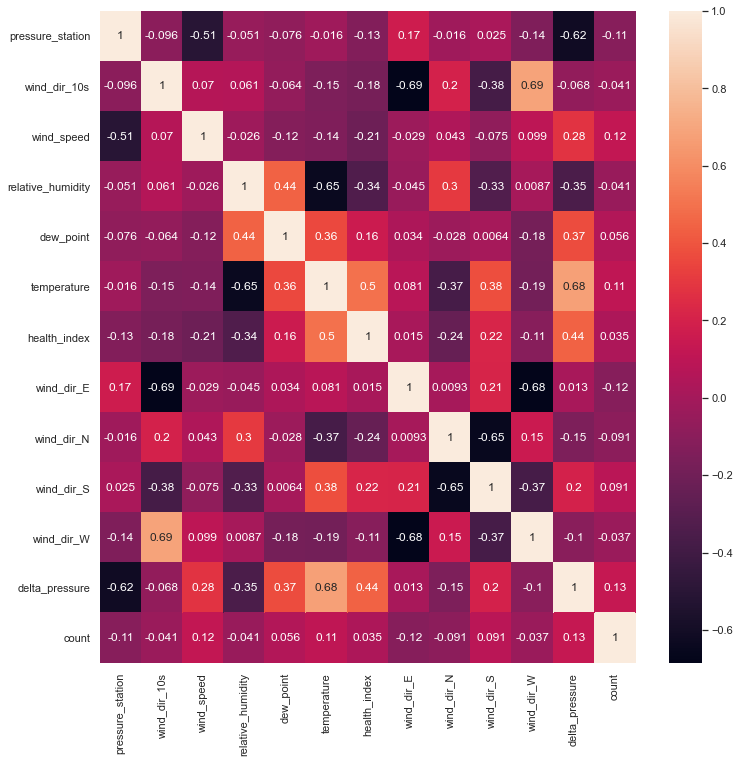

In [123]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(Lr_data.corr(), annot=True, ax=ax)

pressure_station	wind_dir_10s	wind_speed	relative_humidity	dew_point	temperature	health_index	

<AxesSubplot:xlabel='count', ylabel='Density'>

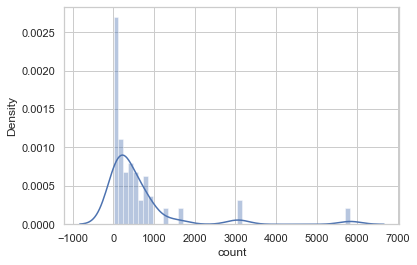

In [124]:
sns.distplot(Lr_data["count"])

### Training and testing datasets

In [125]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import sklearn as sk

train and test data

In [126]:
Target_data=Lr_data.loc[:,['count']].values
#"delta_pressure","relative_humidity","dew_point"
Feature_data=Lr_data.loc[:,["pressure_station","wind_dir_10s","wind_speed","relative_humidity","dew_point","temperature","health_index"]].values

Feature_data_stand= sk.preprocessing.scale(Feature_data)
Feature_data_norm= sk.preprocessing.minmax_scale(Feature_data)
Feature_data_normalize=sk.preprocessing.normalize(Feature_data)

stand_scaler= sk.preprocessing.StandardScaler()
norm_scaler=sk.preprocessing.MinMaxScaler()
normalize_scaler=sk.preprocessing.Normalizer()
sklreg = linear_model.LinearRegression()
normfeature=norm_scaler.fit_transform(Feature_data)
#Feature_data=Lr_data.drop(columns=["date","count"]).values
X_train, X_test, Y_train, Y_test = train_test_split( Feature_data , Target_data , test_size = 0.3, random_state = 0)

In [127]:
def cross_val_pip(X,Y,model,scoring_type):
    results=[]
    for score in scoring_type:
        scores = cross_val_score(model, X, Y,
                                     scoring=score, 
                                     cv=10, error_score=np.nan)
        #print(score,":", "mean:", scores.mean(),"std:", scores.std())
        results.append(scores.mean())
    series=pd.Series(results,index=scoring_type)
    return series
        

In [128]:
Linear=sklreg
Linear_stand = Pipeline([("scaler",stand_scaler),
                     ("linear_regression", sklreg)])
Linear_norm = Pipeline([("scaler",norm_scaler),
                     ("linear_regression", sklreg)])
Linear_normalize = Pipeline([("scaler",normalize_scaler),
                     ("linear_regression", sklreg)])

In [129]:
results_df = pd.DataFrame()
soclling=["neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error","r2"]
series=cross_val_pip(Feature_data,Target_data,Linear,soclling)
series.name="Liner"
results_df=results_df.append(series)
########
series=cross_val_pip(Feature_data,Target_data,Linear_stand,soclling)
series.name="Linear_stand"
results_df=results_df.append(series)
########
series=cross_val_pip(Feature_data,Target_data,Linear_norm,soclling)
series.name="Linear_norm"
results_df=results_df.append(series)
results_df

,neg_mean_absolute_error,neg_mean_squared_error,neg_root_mean_squared_error,r2
Liner,-645.62011,-1.261749e+06,-821.126613,-5.06305
Linear_stand,-645.62011,-1.261749e+06,-821.126613,-5.06305
Linear_norm,-645.62011,-1.261749e+06,-821.126613,-5.06305


In [130]:
sklreg = linear_model.LinearRegression()
sklreg.fit(X_train,Y_train)
np.array([sklreg.intercept_,sklreg.coef_[0]])

array([array([7059.87885471]),
       array([-106.10915584,   -3.54947375,   36.95655685,   29.25835896,
               -85.09690901,  123.56368121,   11.60484368])              ],
      dtype=object)

In [131]:
Y_pred_sk = sklreg.predict(X_test)

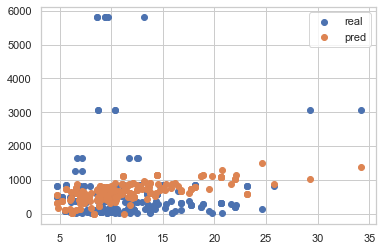

In [132]:
plt.scatter(X_test[:,2],Y_test,label='real')
plt.scatter(X_test[:,2],Y_pred_sk, label='pred')
#plt.scatter(Y_test,Y_pred_sk, label='comparison')
plt.legend();

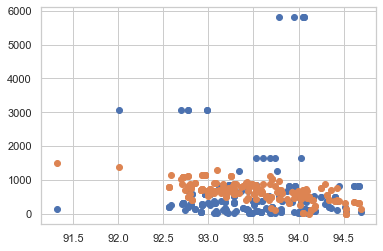

In [133]:
plt.scatter(X_test[:,0],Y_test,label='real')
plt.scatter(X_test[:,0],Y_pred_sk, label='pred')

In [134]:
def cross_val(model,x,y):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [135]:
test_pred = sklreg.predict(X_test)
train_pred = sklreg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 571.9933889019738
MSE: 1032164.5509752019
RMSE: 1015.9549945618663
R2 Square -0.016994392056310703
Train set evaluation:
_____________________________________
MAE: 600.3849205168176
MSE: 1072972.7090612056
RMSE: 1035.8439598034086
R2 Square 0.05804131285531822


In [136]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred) , cross_val(sklreg,Feature_data,Target_data)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,571.993389,1.032165e+06,1015.954995,-0.016994,-5.06305


### polynomial models for predicting the number of female or male mosquitos

#### select data

In [147]:
Po_data=mergedata.drop(columns=["pressure_sea","genus","specific_epithet","trap_region","comparison_group"])
Po_data

,date,pressure_station,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,wind_dir_E,wind_dir_N,wind_dir_S,wind_dir_W,delta_pressure,gender,count,new_trap_date
0,2017-05-07,93.33,31.0,16.5,45.5,-1.10,9.40,2.1,0.0,1.0,0.0,1.0,-7.87,Female,1,2017-05-09
1,2017-05-08,93.69,31.0,8.0,29.5,-3.60,13.50,2.8,0.0,1.0,0.0,1.0,-7.91,Female,1,2017-05-09
2,2017-05-09,93.74,32.0,6.6,40.5,0.35,13.50,2.9,0.0,1.0,0.0,1.0,-7.86,Female,1,2017-05-09
3,2017-05-10,93.47,7.0,10.7,52.0,3.00,13.90,3.5,2.0,1.0,0.0,0.0,-7.83,Female,1,2017-05-09
4,2017-05-11,93.49,11.0,13.9,44.0,3.80,18.15,3.2,2.0,0.0,1.0,0.0,-7.81,Female,1,2017-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2018-09-19,94.14,23.0,5.5,73.0,-0.25,5.85,1.9,0.0,0.0,1.0,1.0,-8.06,Female,1,2018-09-18
776,2018-09-20,94.12,3.0,11.2,68.5,1.10,4.60,2.1,1.0,2.0,0.0,0.0,-8.08,Male,6,2018-09-18
777,2018-09-20,94.12,3.0,11.2,68.5,1.10,4.60,2.1,1.0,2.0,0.0,0.0,-8.08,Female,5,2018-09-18
778,2018-09-20,94.12,3.0,11.2,68.5,1.10,4.60,2.1,1.0,2.0,0.0,0.0,-8.08,Male,3,2018-09-18


In [138]:
# def count_female_male(x):
#     x["Female"]= 0 if x[x["gender"]=="Female"]["count"].sum()==0 else x[x["gender"]=="Female"]["count"].median()
#     x["Male"]= 0 if x[x["gender"]=="Male"]["count"].sum()==0 else x[x["gender"]=="Male"]["count"].median()
#     return x[0:1].drop(columns=["gender"])

In [151]:
def count_female_male(x):
    x["Female"]=x[x["gender"]=="Female"]["count"].sum()
    x["Male"]= x[x["gender"]=="Male"]["count"].sum()
    return x[0:1].drop(columns=["gender"])

In [152]:
#Po_data[Po_data["new_trap_date"]=="2018-09-18"]

In [153]:
#Po_data=Po_data[Po_data["count"]<=(Po_data["count"].describe()["75%"]+Po_data["count"].describe()["std"])]
Po_data=Po_data.groupby("date", as_index=False).apply(count_female_male).droplevel(0)
Po_data

,date,pressure_station,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,wind_dir_E,wind_dir_N,wind_dir_S,wind_dir_W,delta_pressure,count,new_trap_date,Female,Male
0,2017-05-07,93.33,31.0,16.5,45.5,-1.10,9.40,2.1,0.0,1.0,0.0,1.0,-7.87,1,2017-05-09,1,0
1,2017-05-08,93.69,31.0,8.0,29.5,-3.60,13.50,2.8,0.0,1.0,0.0,1.0,-7.91,1,2017-05-09,1,0
2,2017-05-09,93.74,32.0,6.6,40.5,0.35,13.50,2.9,0.0,1.0,0.0,1.0,-7.86,1,2017-05-09,1,0
3,2017-05-10,93.47,7.0,10.7,52.0,3.00,13.90,3.5,2.0,1.0,0.0,0.0,-7.83,1,2017-05-09,1,0
4,2017-05-11,93.49,11.0,13.9,44.0,3.80,18.15,3.2,2.0,0.0,1.0,0.0,-7.81,1,2017-05-09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2018-09-16,94.02,7.0,12.0,96.0,1.50,2.05,1.1,2.0,1.0,0.0,0.0,-8.08,6,2018-09-18,6,9
764,2018-09-17,94.05,35.0,6.2,89.0,0.70,2.25,1.2,0.0,2.0,0.0,1.0,-8.05,6,2018-09-18,6,9
768,2018-09-18,94.18,29.0,8.8,80.0,0.95,5.40,1.4,0.0,1.0,0.0,2.0,-8.12,6,2018-09-18,6,9
772,2018-09-19,94.14,23.0,5.5,73.0,-0.25,5.85,1.9,0.0,0.0,1.0,1.0,-8.06,6,2018-09-18,6,9


<AxesSubplot:>

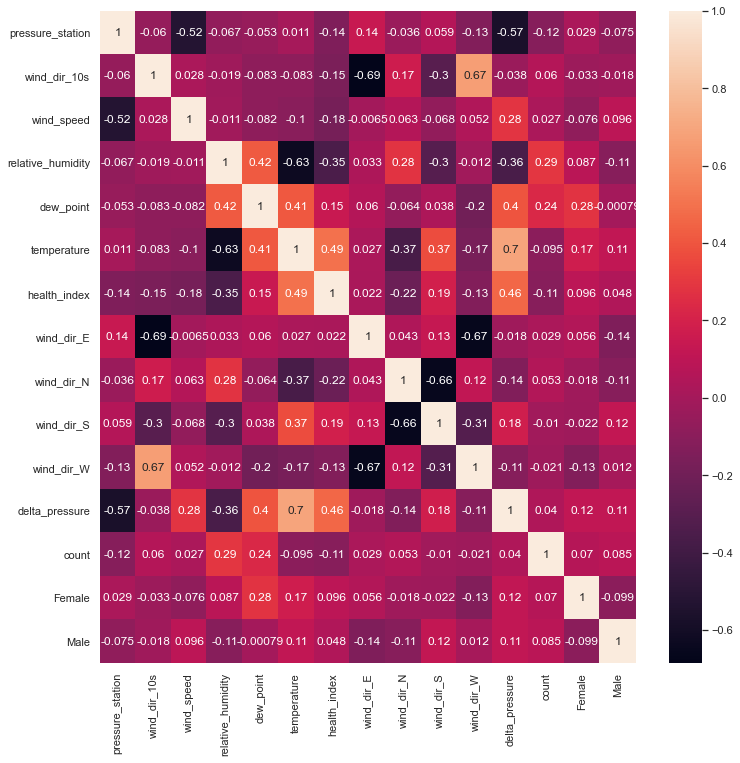

In [154]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(Po_data.corr(), annot=True, ax=ax)

#### build polynomial regression model

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.utils import shuffle

In [156]:
Target_data=Po_data.loc[:,['Female']].values
Feature_data=Po_data.loc[:,['wind_speed', 'temperature', 'health_index']] .values

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split( Feature_data , Target_data , test_size = 0.3, random_state = 0)

In [158]:
def compute_mse_cv(X, Y, n_degree=11):
    mse = []
    std = []
    for degree in range(1,n_degree):
        poly_features = PolynomialFeatures(degree=degree)
        sklreg = linear_model.LinearRegression()
        pipeline = Pipeline([("polynomial_features", poly_features),
                             ("linear_regression", sklreg)])
        pipeline.fit(X, Y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X, Y,
                                 scoring="neg_mean_squared_error", 
                                 cv=10, error_score=np.nan)
        
        mse.append(-scores.mean())
        std.append(scores.std())       
    return mse,std

In [159]:
def compute_mse(X_train, Y_train, X_test, Y_test, n_degree=11):
    train_mse = []
    test_mse = []
    for degree in range(1,n_degree):
        poly_features = PolynomialFeatures(degree=degree)
        sklreg = linear_model.LinearRegression()
        pipeline = Pipeline([("polynomial_features", poly_features),
                             ("linear_regression", sklreg)])
        pipeline.fit(X_train, Y_train)
        Y_train_pred = pipeline.predict(X_train)
        Y_test_pred = pipeline.predict(X_test)

        train_mse.append(mean_squared_error(Y_train, Y_train_pred))
        test_mse.append(mean_squared_error(Y_test, Y_test_pred))
    return train_mse,test_mse

def compute_scale_cov(X_train, Y_train, X_test, Y_test,scale_model, n_degree=11):
    train_mse = []
    test_mse = []
    for degree in range(1,n_degree):
        poly_features = PolynomialFeatures(degree=degree)
        sklreg = linear_model.LinearRegression()
        pipeline = Pipeline([("scaler",scale_model),
                             ("polynomial_features", poly_features),
                             ("linear_regression", sklreg)])
        pipeline.fit(X_train, Y_train)
        Y_train_pred = pipeline.predict(X_train)
        Y_test_pred = pipeline.predict(X_test)

        train_mse.append(mean_squared_error(Y_train, Y_train_pred))
        test_mse.append(mean_squared_error(Y_test, Y_test_pred))
    return train_mse,test_mse

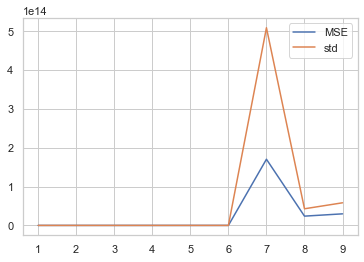

In [160]:
mse,std = compute_mse_cv(X_train,Y_train,10)
plt.plot(range(1,len(mse)+1),mse, label='MSE')
plt.plot(range(1,len(std)+1),std, label='std')
plt.legend();

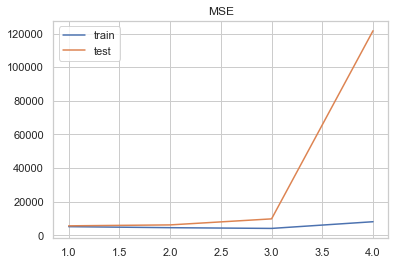

In [161]:
train_mse,test_mse = compute_mse(X_train,Y_train,X_test,Y_test,5)
plt.plot(range(1,len(train_mse)+1),train_mse, label='train')
plt.plot(range(1,len(test_mse)+1),test_mse, label='test')
plt.title('MSE')
plt.legend();

In [164]:
np.argmin(train_mse)

2

Performances in normalization and standardization

In [165]:
stand_scaler= sk.preprocessing.StandardScaler()
norm_scaler=sk.preprocessing.MinMaxScaler()
normalize_scaler=sk.preprocessing.Normalizer()

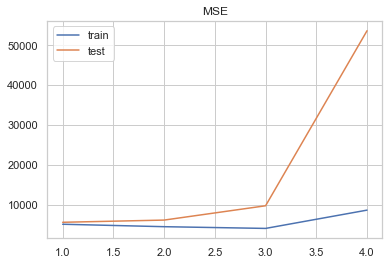

In [166]:
train_mse,test_mse = compute_scale_cov(X_train,Y_train,X_test,Y_test,norm_scaler,5)
plt.plot(range(1,len(train_mse)+1),train_mse, label='train')
plt.plot(range(1,len(test_mse)+1),test_mse, label='test')
plt.title('MSE')
plt.legend();

choose 13 degree as the best degree

In [199]:
poly_features = PolynomialFeatures(degree=2)
sklreg = linear_model.LinearRegression()
polpipeline = Pipeline([("polynomial_features", poly_features),
                     ("linear_regression", sklreg)])
polpipeline.fit(X_train,Y_train)


Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [200]:
results_df = pd.DataFrame()
soclling=["neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error","r2"]
series=cross_val_pip(X_train,Y_train,polpipeline,soclling)
series.name="Polynomial model"
results_df=results_df.append(series)
results_df

,neg_mean_absolute_error,neg_mean_squared_error,neg_root_mean_squared_error,r2
Polynomial model,-55.137244,-5606.840021,-72.134271,-0.447012


In [201]:
#test_pred=evaluate(Y_test,Predict_Y)
Predict_train_Y=polpipeline.predict(X_train)
Predict_test_Y=polpipeline.predict(X_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, Predict_test_Y)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, Predict_train_Y)

Test set evaluation:
_____________________________________
MAE: 57.43597453797372
MSE: 6172.944577502463
RMSE: 78.56808879884035
R2 Square -0.08680804316699908
Train set evaluation:
_____________________________________
MAE: 50.09149667984362
MSE: 4516.099435421394
RMSE: 67.20193029535234
R2 Square 0.14192438817634823
